# Zoo chart
|Topic|Graph type | Modules used |
|-----|-------------|------------------|
|[Chart Oscar nominee](#chart-oscar-nominee)  | Bar chart |  matplotlib, requests, bs4, pandas|
|[Dot plot](#dot-plot)  | Dot plot,  2 grap, point size, vertical bar, xlabel inside | matplotlib,h, numpy, pandas |



# Chart Oscar nominee
### Importing modules

In [13]:
import bs4 
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


### Downloading the data

In [39]:
# Perform the request & check status code
page = "https://en.wikipedia.org/wiki/List_of_actors_with_two_or_more_Academy_Awards_in_acting_categories"
r = requests.get(page);
if r.status_code != 200:
    print(f"The page is not available.\nThe current status code is {r.status_code}")
else:
    soup = bs4.BeautifulSoup(r.text)

### Retrieve the table

In [4]:
# find the table (JUST ONE) in the document and extract the rows
table = soup.find('table')
rows = table.find_all('tr')

### Extract the necessary data

In [5]:

# extract the value and save it a multi level list
arr = []
for i in rows:
    table_data = i.find_all('td')
    # table_data = table_data[0]
    data = [j.text for j in table_data]
    if len(data) == 0:
        continue
    else:
        arr.append(data)

### Convert it into a Dataframe

In [6]:

# Convert the list into a dataframe
df = pd.DataFrame(arr)

# data cleaning, remove axis and transforming text ininteger
df = df.drop([1, 2], axis=1)
df[0] = df[0].apply(lambda x:  x.strip("\n"))
df[0] = df[0].apply(lambda x:  x.strip("†"))
df[3] = df[3].astype(int)
df[4] = df[4].astype(int)

# rename the columns
df = df.rename(columns = {0:"Actor", 3:"Total awards", 4:"Total nominations"})

# rename the columns & reset index
df.sort_values(by=["Total nominations"], ascending=False, inplace=True)
df.reset_index(inplace=True, drop=True)

### Plotting

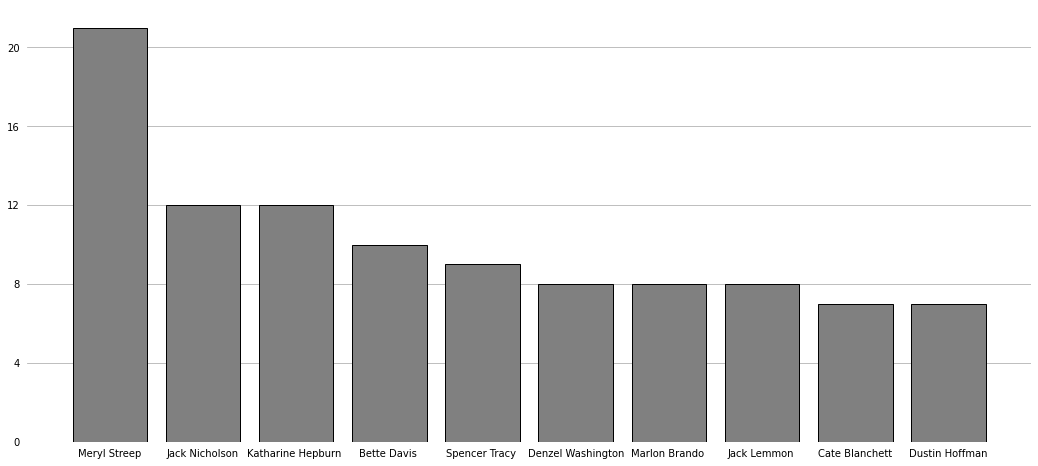

In [37]:
# take a subsample of the dataset
subsample = df[0:10]
# start the plotting (BAR chart)
fig, ax = plt.subplots(figsize = (18, 8)) # set the dimensions of the graph
plt.tick_params(bottom=False, left=False)
# plt.grid(axis = 'y')
ax.grid(visible = True, axis="y")
plt.yticks(np.arange(0, 21, 4))
ax.set_axisbelow(True)
# remove the outer border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# select which column to show in x and y axis
plt.bar(subsample["Actor"],subsample["Total nominations"], color="grey", edgecolor="black", )
plt.show()

------------------

# Dot plot
### Importing modules

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [189]:

data = {'Taiwan' : {'male' : 2749, 'female' : 956},
        'Georgia' : {'male' : 444, 'female' : 161},
        'South Korea' : {'male' : 7172, 'female' : 3370},
        'Iran' : {'male' : 3257, 'female' : 1531},
        'Iraq' : {'male' : 3434, 'female' : 1622},
        'Jordan' : {'male' : 316, 'female' : 156},
        'Uganda' : {'male' : 673, 'female' : 341},
        'Malaysia' : {'male' : 495, 'female' : 255},
        'Saudi Arabia' : {'male' : 227, 'female' : 122},
        'Armenia' : {'male' : 393, 'female' : 221},
        'Colombia' : {'male' : 124, 'female' : 78},
        'Lebanon' : {'male' : 76, 'female' :48},
        'Czech Republic' : {'male' : 1358, 'female' :870},
        'Morocco' : {'male' : 3916, 'female' : 2564},
        'Greece' : {'male' : 1100, 'female' : 792},
        'Switzerland' : {'male' : 2196, 'female' : 1604},
        'Austria' : {'male' : 1436, 'female' : 1064},
        'Belgium' : {'male' : 1221, 'female' : 905},
        'France' : {'male' : 6856, 'female' : 5085},
        'Canada' : {'male' : 3021, 'female' : 2395},
        'Germany' : {'male' : 14506, 'female' : 11533},
        'Iceland' : {'male' : 20, 'female' : 16},
        'Turkey' : {'male' : 2591, 'female' : 2093},
        'Norway' : {'male' : 664, 'female' : 538},
        'Denmark' : {'male' : 764, 'female' : 624},
        'United Kingdom' : {'male' : 10265, 'female' : 8485},
        'Mexico' : {'male' : 2280, 'female' : 1887},
        'Chile' : {'male' : 231, 'female' : 192},
        'Madagascar' : {'male' : 307, 'female' : 258},
        'Algeria' : {'male' : 4310, 'female' : 3649},
        'Slovenia' : {'male' : 251, 'female' : 214},
        'Hungary' : {'male' : 680, 'female' : 595},
        'Spain' : {'male' : 4608, 'female' : 4088},
        'Romania' : {'male' : 2490, 'female' : 2274},
        'Ireland' : {'male' : 638, 'female' : 584},
        'Bulgaria' : {'male' : 311, 'female' : 285},
        'Sweden' : {'male' : 1744, 'female' : 1627},
        'Slovak Republic' : {'male' : 1471, 'female' : 1407},
        'United States' : {'male' : 29008, 'female' : 28397},
        'Australia' : {'male' : 5825 - 2911, 'female' : 2911},
        'Israel' : {'male' : 756, 'female' : 778},
        'Macedonia' : {'male' : 77, 'female' : 80},
        'Croatia' : {'male' : 410, 'female' : 428},
        'Italy' : {'male' : 4960, 'female' : 5228},
        'Estonia' : {'male' : 83, 'female' : 92},
        'New Zealand' : {'male' : 461, 'female' : 526},
        'Finland' : {'male' : 813, 'female' : 937},
        'Ukraine' : {'male' : 4080, 'female' : 4838},
        'Kyrgyzstan' : {'male' : 307, 'female' : 252},
        'Argentina' : {'male' : 422, 'female' : 515},
        'Mongolia' : {'male' : 61, 'female' : 75},
        'Thailand' : {'male' : 1273, 'female' : 1716},
        'Lithuania' : {'male' : 171, 'female' : 235},
        'Uruguay' : {'male' : 16, 'female' : 23},
        'Latvia' : {'male' : 53, 'female' : 79},
        'Portugal' : {'male' : 1111, 'female' : 1816}}
 
df = pd.DataFrame.from_dict(data).transpose()
 
df['tot'] = df.apply(lambda row: row.male + row.female, axis=1)
df["perc_male"] = (df.male / df.tot) * 100
df["scale_male"] = (df.male / 100 )
df["perc_female"] = (df.female / df.tot) * 100
df["scale_female"] = (df.female / 100 )


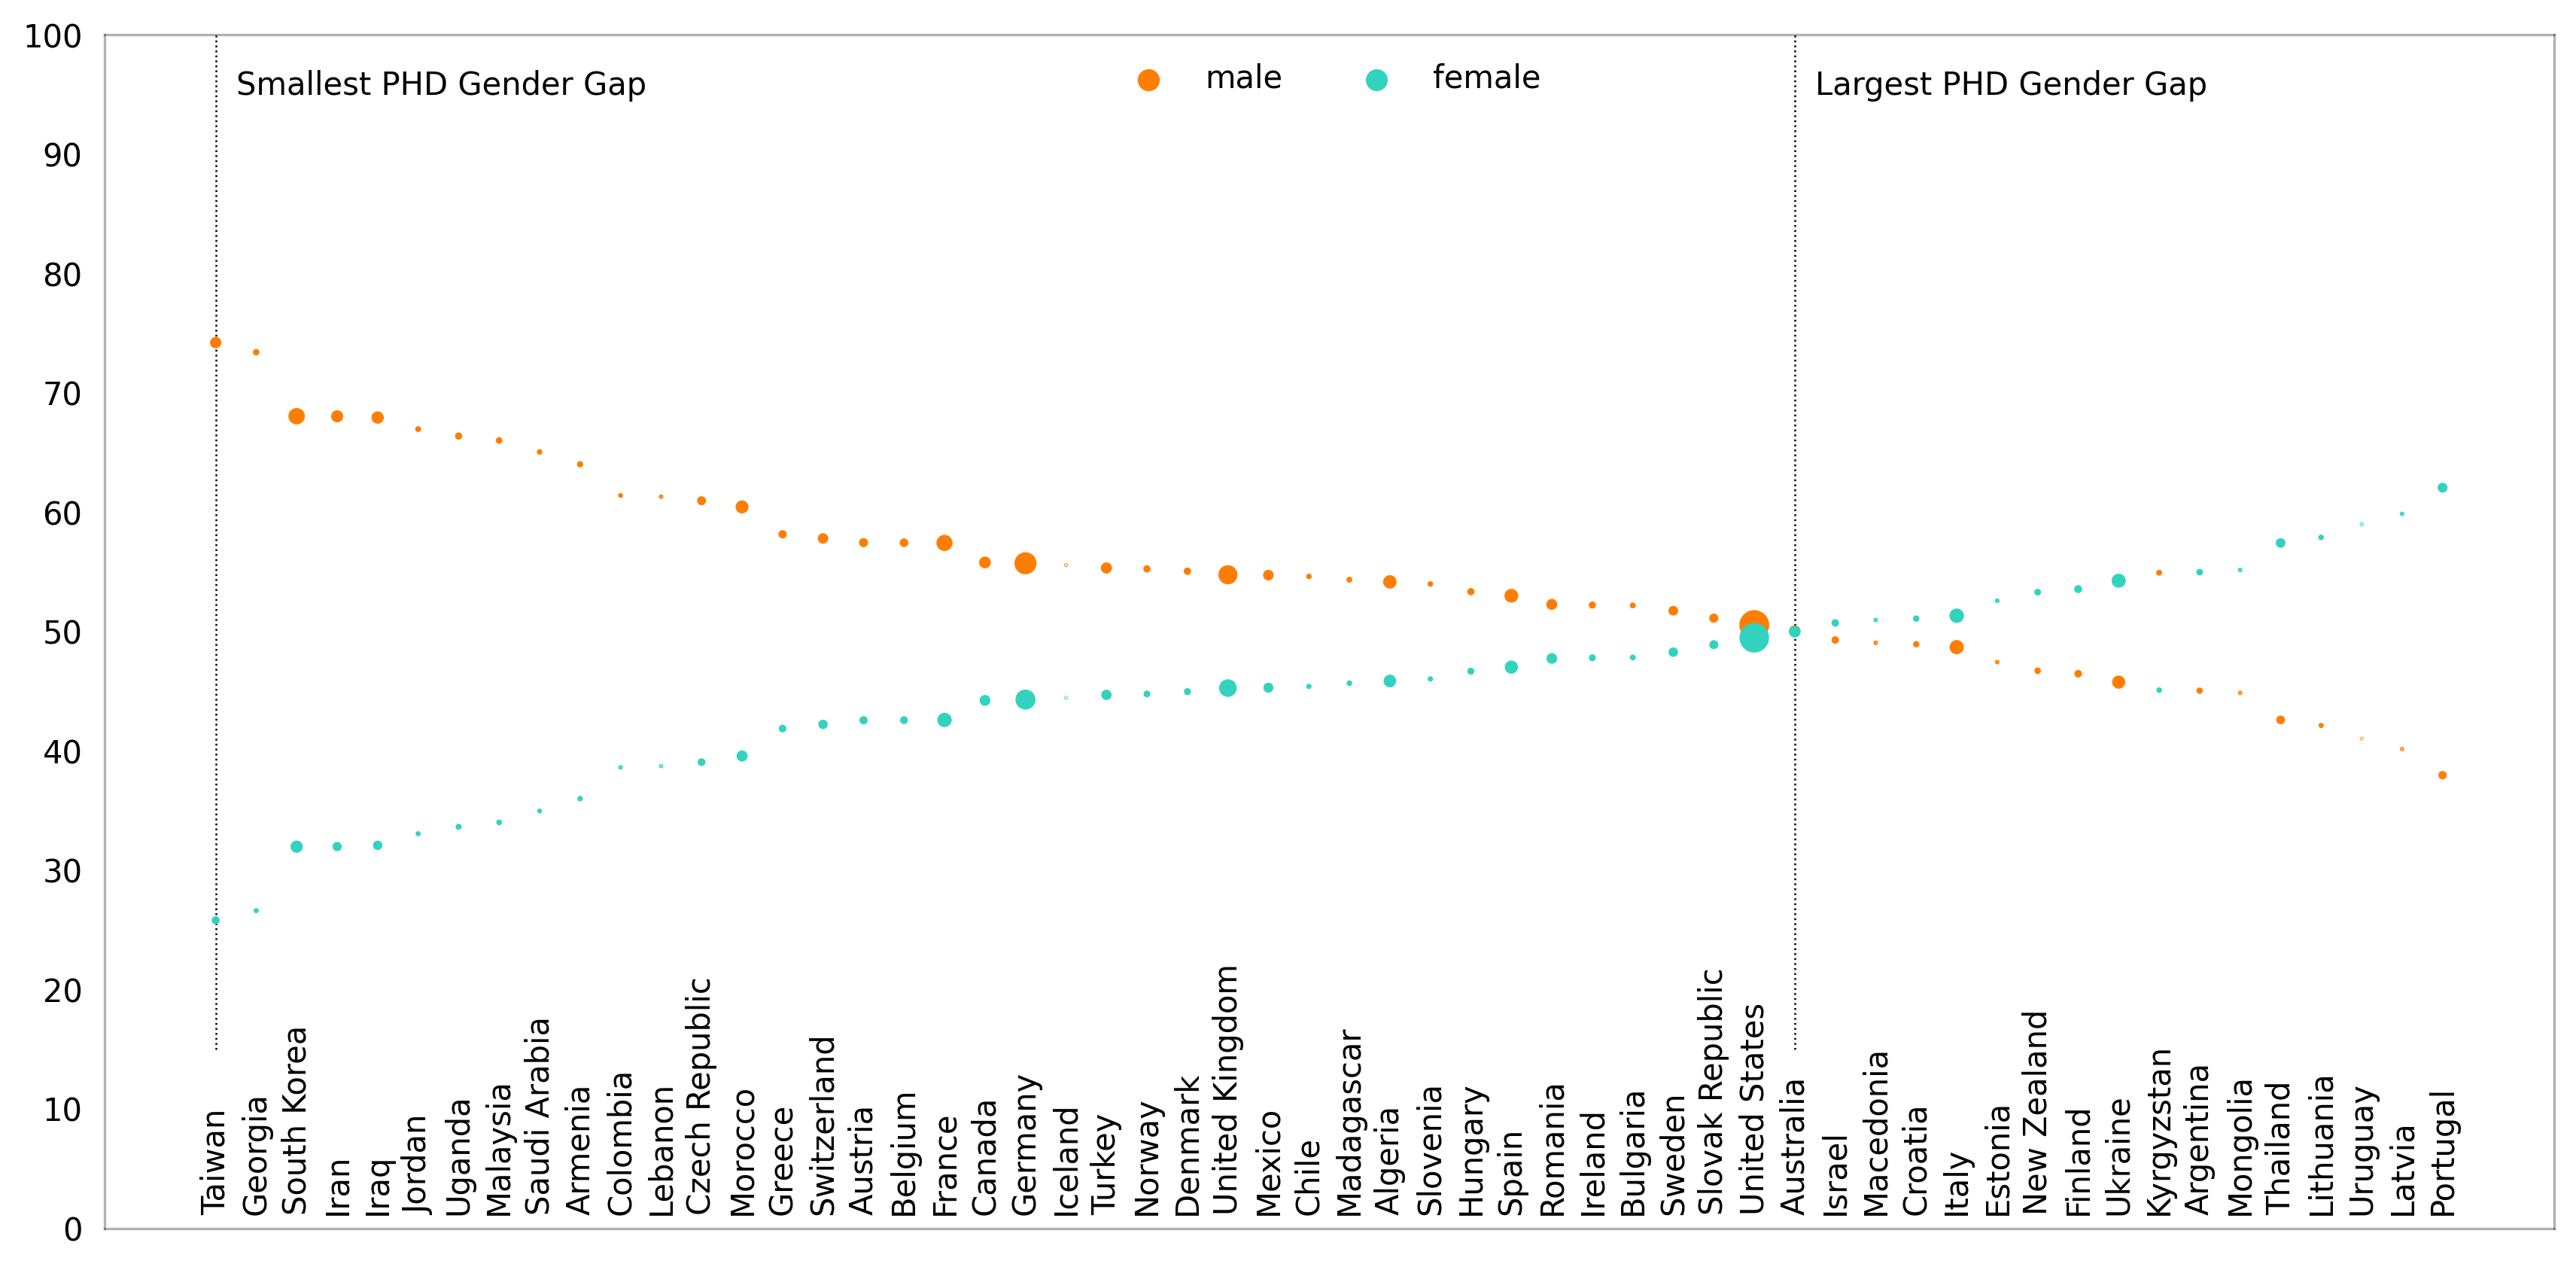

In [207]:
# make two subplots in one
fig, ax = plt.subplots(1, 1, figsize=(14, 7), dpi=300)

# define the data to e plotted
ax.scatter(x=df.index, y=df["perc_male"], c='#FF7D00', s=df["scale_male"], marker=".", zorder=1, label="male")
ax.scatter(x=df.index, y=df["perc_female"], c='#31D3BE', s=df["scale_female"], marker=".", zorder=1, label="female")

ax.legend(loc="upper center", ncol=2, frameon=0 )

# Set y limit for chart
ax.set_ylim(bottom=0, top=100)

# set ticks parameters
ax.set_xticks(ticks=range(0, df.shape[0]), labels=df.index, rotation=90, va="baseline")
ax.set_yticks(np.arange(0, 110, 10))

# remove ticks from axis
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

xticks = [*ax.xaxis.get_major_ticks(), *ax.xaxis.get_minor_ticks()]

for tick in (xticks):
        tick.set_pad(-10)

# make the border more transparent
for i in ["top", "bottom", "right", "left"]:
        ax.spines[i].set_alpha(0.3)

# add two columns
df['idx'] = range(0, df.shape[0])
df['abs_diff'] = abs(df.perc_male - df.perc_female)

# compute the minimum and maximum value
min_value = df[df.abs_diff == min(df.abs_diff)].index[0]
max_value = df[df.abs_diff == max(df.abs_diff)].index[0]


# nome del tick con valore minimo
idx_min = df.idx[df.index == min_value]
idx_max = df.idx[df.index == max_value]

# add vertical lines
plt.vlines(x = idx_min, ymin = 15, ymax = 100, color = 'black', linestyle = 'dotted', linewidth = 0.6, zorder=0 )
plt.vlines(x = idx_max, ymin = 15, ymax = 100, color = 'black', linestyle = 'dotted', linewidth = 0.6, zorder=0 )

# annotation of the vertical line
plt.annotate("Largest PHD Gender Gap", (idx_min + 0.5, 95))
plt.annotate("Smallest PHD Gender Gap",(idx_max + 0.5, 95))

plt.show()

